<a href="https://colab.research.google.com/github/mqquiroz/ICV411/blob/main/Tarea_1_Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 (Solución) - ICV 411 - Hidráulica
## Universidad Católica del Maule
---

In [ ]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path

### Problema 1: Diagrama (Ábaco) de Moody

En este problema primeramente se realiza el Análisis Dimensional de la tubería analizada. Las variables son:

\begin{array}{lll}
\text{Variables} & \text{Dimensiones} & \text{Nombre}\\ \hline
\Delta P & [ML^{-1}T^{-2}] & \text{Caída de Presiones} \\
L & [L] & \text{Largo de la tubería} \\
D & [L] & \text{Diámetro de la tubería} \\
V & [LT^{-1}] & \text{Velocidad del flujo} \\
\rho & [ML^{-3}] & \text{Densidad del fluido} \\
\mu & [ML^{-1}T^{-1}] & \text{Viscosidad del fluido} \\
\varepsilon & [L] & \text{Rugosidad de la tubería} \\
\end{array}

Se tienen tres dimensiones ($M$: Masa; $L$: Longitud, y $T$: Tiempo) y siete variables, por lo que se deberán encontrar 4 Números Adimensionales (o números $\Pi$) para este problema.

Se toma como base a $D$, $V$ y $\rho$.

1) $ \Pi_{1} = \Delta P \cdot D^{a}\cdot V^{b}\cdot \rho^{c} $

$[ML^{-1}T^{-2}] \cdot [L]^{a}\cdot [LT^{-1}]^{b} \cdot [ML^{-3}]^{c}=[]^{0}$

Resolviendo el sistema se obtiene:

$$\Pi_{1} = \frac{\Delta P}{V^{2}\cdot \rho}$$

2) $ \Pi_{2} = L \cdot D^{a}\cdot V^{b}\cdot \rho^{c} $

$ \left[𝐿\right] \cdot \left[𝐿\right]^{a}\cdot \left[𝐿𝑇^{−1}\right]^{b}\cdot \left[𝑀𝐿^{−3}\right]^{c} = \left[\;\right]^{0}$

Resolviendo el sistema se obtiene:

$$\Pi_{2} = \frac{L}{D}$$

3) $ \Pi_{3} = \mu \cdot D^{a}\cdot V^{b}\cdot \rho^{c} $

$ [𝑀𝐿^{−1}𝑇^{−1}] \cdot [𝐿]^{a}\cdot [𝐿𝑇^{−1}]^{b}\cdot [𝑀𝐿^{−3}]^{c} = []^{0}$

Resolviendo el sistema se obtiene:

$$\Pi_{3} = \frac{\mu}{D\cdot V\cdot \rho}$$

Una propiedad interesante de los numeros $\Pi$ es que se pueden invertir sus fracciones, mientras las relaciones sigan siendo adimensionales, asi que:

$$\Pi_{3} = \frac{D\cdot V\cdot \rho}{\mu} = Re$$

4) $ \Pi_{4} = \varepsilon \cdot D^{a}\cdot V^{b}\cdot \rho^{c} $

$ [𝐿] \cdot [𝐿]^{a}\cdot [𝐿𝑇^{−1}]^{b}\cdot [𝑀𝐿^{−3}]^{c} = []^{0}$

Resolviendo el sistema se obtiene:

$$\Pi_{4} = \frac{\varepsilon}{D}$$

Ahora se puede establecer la relación funcional de los parámetros:

$$ \frac{\Delta P}{V^{2}\cdot \rho} = \Phi\left(\frac{L}{D},Re,\frac{\varepsilon}{D} \right)$$

Cabe notar que esta expresión muestra exactamente la dependencia para la pèrdida de carga, con la longitud relativa ($L/D$), el número de Reynolds ($Re$) y la rugosidad relativa ($\varepsilon/D$) de la tubería. El factor de fricción es función de estos últimos dos parámetros adimensionales. Si se utiliza la derivación de la expresión de Darcy-Weisbach se puede llegar a la relación explícita de la pérdida de carga en una tuberia.

El flujo en una tubería circular se puede resolver mediante una ecuación empírica (obtenida a partir de experimentos) donde el término de caída de presión se expresa en términos del factor de fricción ($f$). El factor de fricción es una función de la longitud de entrada ($L/D$), la rugosidad relativa de la tubería ($\varepsilon/D$) y el número de Reynolds ($Re$). La ecuación que resuelve este problema (Ecuación de Colebrook-White), para régimen turbulento, viene dada por:

\begin{equation}
    \frac{1}{\sqrt{f}}=-2 \log _{10}\left(\frac{\varepsilon / D}{3,7}+\frac{2,51}{Re \sqrt{f}}\right) \nonumber
\end{equation}

Cuando el régimen es láminar la ecuación es más simple:

\begin{equation}
f=\frac{64}{Re} \nonumber
\end{equation}

La ecuación para flujo turbulento es implícita y de difícil resolución, es por esto que usualmente se utiliza el diagrama de Moody

#### Newton-Raphson - Ecuación de Colebrook-White

Esta ecuación puede ser resuelta mediante el muy conocido método de Newton-Raphson, el cual tiene la sigueinte estructura:

\begin{equation}
x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})} \nonumber
\end{equation}
El subíndice $i$ denota el número de iteraciones. También, la prima ($'$) denota la primera derivada (i.e. $f'(x_{i})=df(x_{i})/dx_{i}$). Así, eligiendo un valor $x_{i}$ apropiado para comenzar y aplicando la ecuación anterior sucesivamente, el valor de $x_{i+1}$ será encontrado. La convergencia se satisface cuando:

\begin{equation}
\frac{\left|x_{i+1}-x_{i}\right|}{\left|x_{i+1}\right|} < E
\end{equation}

Donde $E$ es la tolerancia del error relativo, esto es, el grado de precisión relativa de la solución $x_{i}$ de la ecuación $f(x_{i})=0$. 

En el caso de esta solución tomamos:

\begin{equation}
    f(x_{i}) = \frac{1}{\sqrt{x_{i}}}+2 \log _{10}\left(\frac{\varepsilon / D}{3,7}+\frac{2,51}{Re \sqrt{x_{i}}}\right) \nonumber
\end{equation}

\begin{equation}
    f'(x_{i}) = -\frac{1}{2\sqrt{x_{i}^3}}-  \left[\frac{\frac{2.51}{Re\sqrt{x_{i}^3}}}{\frac{\varepsilon/D}{3.7}+\frac{2,51}{Re\sqrt{x_{i}}}}  \right]\times \log_{10}\left(e\right) \nonumber
\end{equation}

Para la solución inicial $x_{i}$ Se puede utilizar la ecuación de Blasius (para tuberías lisas):

\begin{equation}
x_{1} = \frac{0.316}{Re^{1/4}}
\end{equation}

o inclusive un valor constante inicial de $x_{1} = 0.03$ (factor de fricción $f=0.03$).

Así, se genera un código capaz de resolver mediante este método la ecuación de Colebrook-White utilizando como valores de entrada la rugosidad relativa ($\varepsilon/D$) y el número de Reynolds $Re$. El valor de salida es el factor de fricción ($f$). Se considera además una tolerancia del error relativo, $E$, como $10^{-6}$.

In [ ]:
#Problema 1
#Universidad Católica del Maule
#By Marco Quiroz (mqquiroz@ucm.cl)
#------------------------------

#Datos

#Rugosidad relativa (varepsilon/D)
e_D = np.array([0,1e-6,5e-6,1e-5, 5e-5, 1e-4, 2e-4, 4e-4, 6e-4, 8e-4, 1e-3, 2e-3, 4e-3, 6e-3, 8e-3, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05])

#Numero de Reynolds
#Re Laminar
Re_lam = np.logspace(2,np.log10(2300),50)
#Re Turbulento
Re_tur = np.logspace(np.log10(2300),8,100)


#Método de Newton-Raphson
# Para encontrar el factor de friccion en funcion de e/D y Re
def NewtonRhapson(e_D,Re):
  x0 = 0.03
  for i in range(50):
    if x0 <= 0:
      xx = np.nan
      break
    f = 1/np.sqrt(x0) + 2*np.log10((e_D/3.7)+(2.51/(Re*np.sqrt(x0)))) 
    fprima = -1/np.sqrt(x0**3) - ( (2.51/(Re*np.sqrt(x0**3)))/( (e_D/3.7) + (2.51/(Re*np.sqrt(x0))) )  )*np.log10(np.exp(1))
    dxx = -f/fprima
    if np.abs(dxx/x0) < 1e-6:
      xx = x0
      break
    #elif np.isnan(dxx):
    #  xx = np.nan
    #  break 
    x0 = x0 + dxx
  return xx   
 
#Factor de Fricción Turbulento
f_tur = np.zeros((len(e_D),len(Re_tur)))

for i in range(len(e_D)):
  for j in range(len(Re_tur)):
    f_tur[i,j] = NewtonRhapson(e_D[i],Re_tur[j])

#Factor de Fricción Láminar
f_lam = 64/Re_lam

#Límite de Independencia del Factor de Fricción
f_indep = np.zeros(len(Re_tur))

for j in range(len(Re_tur)):
  f_indep[j] = NewtonRhapson(1600/Re_tur[j],Re_tur[j])

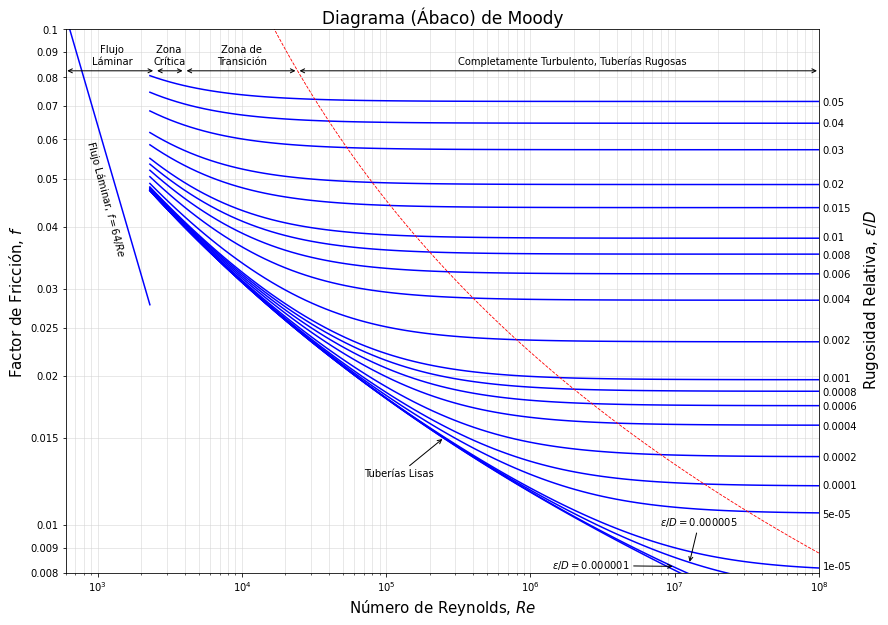

In [ ]:
#Figura
alto  = 10
ancho = 13.5
fig = plt.figure(figsize=(ancho, alto))

#Curvas
plt.loglog(Re_lam,f_lam,'b')
plt.loglog(Re_tur,f_tur.T,'b')
plt.loglog(Re_tur,f_indep,'r', linestyle='--',linewidth=0.85)


plt.title('Diagrama (Ábaco) de Moody',fontsize=17) #Texto en título
plt.xlabel('Número de Reynolds, $Re$',fontsize=15) #Texto en eje x
plt.ylabel('Factor de Fricción, $f$',fontsize=15) #Texto en eje y
plt.yticks([0.008,0.009,0.01, 0.015, 0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],[0.008,0.009,0.01, 0.015, 0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1])
plt.xlim(600,10**8) #Límites (rango) e eje x
plt.ylim(8e-3,0.1) #Límites (rango) e eje y
plt.grid(which='both',color='lightgray', linestyle='-', linewidth=0.5) #Grilla

#Anotaciones (Texto y flechas útiles para entender la gráfica)
plt.annotate("Tuberías Lisas",xy=(10**5.4, 0.015), xycoords='data', xytext=(10**4.85, 0.0125), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),)

plt.annotate(r'$\varepsilon/D = 0.000001$',xy=(10**7, 0.00825), xycoords='data', xytext=(10**6.15, 0.00815), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),)

plt.annotate(r'$\varepsilon/D = 0.000005$',xy=(10**7.1, 0.00835), xycoords='data', xytext=(10**6.9, 0.00995), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),)

plt.text(10**2.9,0.035,'Flujo Láminar, $f =64/Re$',rotation=-75)

plt.annotate('', xy=(10**4.385,0.0825), xytext=(10**8,0.0825), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(10**np.log10(4000),0.0825), xytext=(10**4.385,0.0825), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(10**np.log10(2500),0.0825), xytext=(10**np.log10(4000),0.0825), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(10**2.775,0.0825), xytext=(10**np.log10(2500),0.0825), arrowprops=dict(arrowstyle='<->'))
plt.text(10**5.5,0.085,'Completamente Turbulento, Tuberías Rugosas')
plt.text(10**4,0.085,'Zona de\nTransición',ha='center')
plt.text(10**3.5,0.085,'Zona \nCrítica',ha='center')
plt.text(10**3.1,0.085,'Flujo\nLáminar',ha='center')
plt.text(10**8.3,0.0285,r'Rugosidad Relativa, $\varepsilon/D$',fontsize=15,rotation=90,va='center')

#Texto curvas de rugosidad relativa
pos_e_D = np.array([0.071, 0.0645, 0.057, 0.0485, 0.0435, 0.038, 0.035, 0.032, 0.0285, 0.0235, 0.0197, 0.0185, 0.0173, 0.0158, 0.0137, 0.012,   0.0105, 0.00825])
for i in range(len(e_D)-3):
  plt.text(10**8.025,pos_e_D[i],e_D[len(e_D)-1-i],va='center')


plt.show() #Mostrar Figura

### Problema 2: Flujo alrededor de una Cepa de un Puente

En este problema, nos interesa conocer el campo de velocidades asociado a el flujo alrededor de la cepa. Lejos de la cepa, el flujo puede considerarse uniforme.

La función que describe las líneas de corriente viene dada por:

\begin{equation}
    \psi=U r\left(1-\frac{a^{2}}{r^{2}}\right) \sin \theta \nonumber
\end{equation}

La solución a este problema se formula mejor en coordenadas polares $(r,\theta)$. Para este caso, la ecuación de Laplace en coordenadas polares es:

\begin{equation}
    \nabla^{2} \psi=\frac{\partial^{2} \psi}{\partial r^{2}}+\frac{1}{r} \frac{\partial \psi}{\partial r}+\frac{1}{r^{2}} \frac{\partial^{2} \psi}{\partial \theta^{2}}=0 \nonumber
\end{equation}

Las componentes de la velocidad radial y angular, $v_{r}$ y $v_{\theta}$, se pueden expresar en términos de la función de corriente:

\begin{equation}
    v_{r}=\frac{1}{r} \frac{\partial \psi}{\partial \theta} = U \left(1-\frac{a^{2}}{r^{2}}\right)\cos\theta \qquad\qquad\qquad v_{\theta}=-\frac{\partial \psi}{\partial r} = -U\left(1+\frac{a^{2}}{r^{2}}\right)\sin\theta \nonumber
\end{equation}

De esta forma la relación entre componentes de velocidad en coordenadas cartesianas y polares puede ser expresada por:

\begin{equation}
    \begin{array}{l}
v_{x}=v_{r} \cos \theta-v_{\theta} \sin \theta \\
v_{y}=v_{r} \sin \theta+v_{\theta} \cos \theta
\end{array} \nonumber
\end{equation}

Para este problema, se considera un radio de sección transversal de la cepa, $a$ = 5 [m], una velocidad uniforme lejos de la cepa, $U$ = 1 [m/s]. En un dominio de al menos, (−15 < $x$ < 15) [m] e (−15 < $y$ < 15) [m]. Se debe graficar las Líneas de Corriente, El Campo de Velocidad y Los Vectores de Velocidad. 

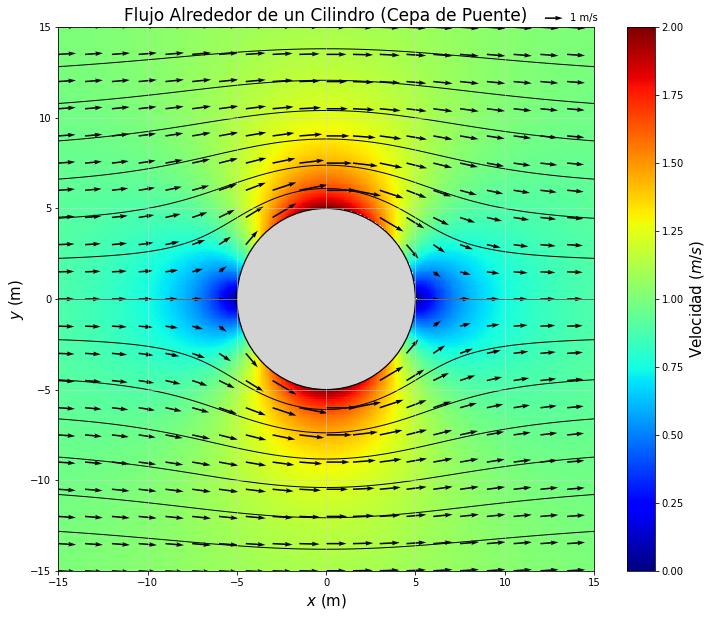

In [ ]:
#Problema 2
#Universidad Católica del Maule
#By Marco Quiroz (mqquiroz@ucm.cl)
#------------------------------

#Datos
U = 1 #m/s
a = 5 #m

#declaramos vectores en el eje x e y

dx = 0.1 #tamaño de discretización
x = np.arange(-15,15+dx,dx) #vector en x
y = x #vector en y

#Grilla X,Y rectangular
X,Y = np.meshgrid(x,y)

#Coordenadas polares: Radio y ángulo
R = np.sqrt(X**2+Y**2)
THETA = np.arctan2(Y,X)

#Circulo
x0, y0, radius = 0.0, 0.0, a
r = np.sqrt((X - x0)**2 + (Y - y0)**2)

outside = r > radius
inside = r < radius


#Funcion de Corriente
PHI = U*R*(1-(a**2/R**2))*np.sin(THETA)

PHI[inside] = np.nan

#Figura
fig, ax = plt.subplots(figsize=(12, 10))

#Lineas de Corriente
ax.contour(X,Y,PHI,levels=np.arange(-12,12+2,2),linewidths=1.0,colors='k',linestyles='-',zorder=-5)

#Velocidad Radial
Vr = U*(1-(a**2/R**2))*np.cos(THETA)
#Velocidad Angular
Vtheta = -U*(1+(a**2/R**2))*np.sin(THETA)

#Velocidades Cartesianas Vx, Vy
Vx = Vr*np.cos(THETA) - Vtheta*np.sin(THETA)
Vy = Vr*np.sin(THETA) + Vtheta*np.cos(THETA)

#Magnitud de la velocidad
V_total = np.sqrt(Vx**2 + Vy**2)

V_total[inside] = np.nan

#Círculo (Geometría)
circulo = plt.Circle((0, 0), a, facecolor='lightgray', edgecolor='k', linewidth=1.25)
ax.add_patch(circulo)

#Mapa de colores (Campo de Velocidad)
pc = ax.pcolormesh(X,Y,V_total,vmin=0,vmax=2*U,zorder=-10,cmap=plt.get_cmap('jet'))
cbar = fig.colorbar(pc)
cbar.set_label('Velocidad $(m/s)$',fontsize=15)

Vx[inside] = np.nan
Vy[inside] = np.nan

#Otra opcion para dibujar las líneas de Corriente
#ax.streamplot(X,Y,Vx,Vy)

# Vectores de Velocidad
rho = 15 #densidad de flechas
Q = ax.quiver(X[::rho,::rho],Y[::rho,::rho],Vx[::rho,::rho],Vy[::rho,::rho],scale=30)
ax.quiverkey(Q, X=13.25, Y=15.5, U=1, label='1 m/s', labelpos='E', coordinates='data')

plt.title('Flujo Alrededor de un Cilindro (Cepa de Puente)',fontsize=17) #Texto en título
plt.xlabel('$x$ (m)',fontsize=15) #Texto en eje x
plt.ylabel('$y$ (m)',fontsize=15) #Texto en eje y
plt.xlim(-15,15) #Límites (rango) e eje x
plt.ylim(-15,15) #Límites (rango) e eje y
plt.grid(color='lightgray', linestyle='-', linewidth=0.5) #Grilla

plt.show() #Mostrar Figura